# Imports

In [359]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import seaborn as sns
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVR
from sklearn.svm import NuSVR
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import NuSVC

# Handling DataSet

In [69]:
train_df = pd.read_csv('datasets/train.csv')  # we use pandas to read our data

In [70]:
test_df = pd.read_csv('datasets/test.csv')

In [72]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C



 #### I would to have the data with the following strucute: X*y so that X is the feature matrix and y the output vector

In [73]:
train_df['Survived'] = train_df.pop('Survived')  # we move the 'Survived' column to the end of data frame

In [74]:
train_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


 #### We have to check the correlations between our features and Survived values to see if they will help us

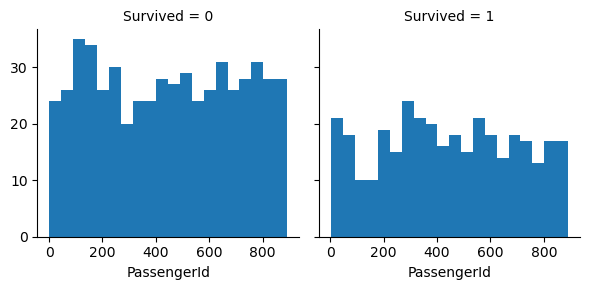

In [75]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'PassengerId', bins=20)
plt.show()

 #### We remove the PassengerId feature

In [76]:
train_df = train_df.drop('PassengerId', axis=1)
test_df = test_df.drop('PassengerId', axis=1)

In [77]:
train_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [78]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


 #### We will pass now to see the feature "Sex". First, I would like to take this into a numerical variable:

In [79]:
train_df['Sex'] = (train_df['Sex']=='male').astype(int)   # Males are assign number 1 and females 0
test_df['Sex'] = (test_df['Sex']=='male').astype(int)

In [80]:
train_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1
4,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,0
887,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,1
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,1


In [81]:
# check the correlation between sex and survived status
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,0,0.742038
1,1,0.188908


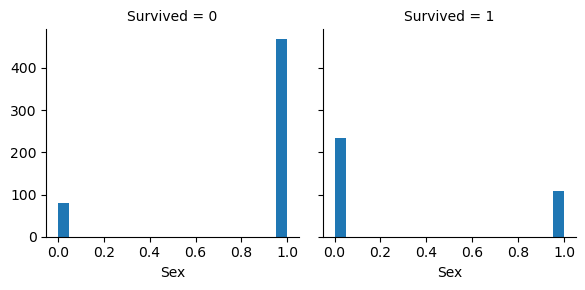

In [82]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Sex', bins=20)
plt.show()

 #### 'Cabin' is missing many values and 'Ticket' looks complicated so we also do not include them 

In [83]:
# Remove plot trainset
train_df = train_df.drop('Cabin', axis=1)
train_df = train_df.drop('Ticket', axis=1)

In [84]:
# Remove plot testset
test_df = test_df.drop('Cabin', axis=1)
test_df = test_df.drop('Ticket', axis=1)

In [85]:
train_df

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,1
4,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,S,0
887,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,S,1
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,23.4500,S,0
889,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,C,1


In [86]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",1,NaN,0,0,8.0500,S
414,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,C
415,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,S
416,3,"Ware, Mr. Frederick",1,NaN,0,0,8.0500,S


 #### We will pass now to see the feature "Embarked". First, I would like to take this into a numerical variable:

In [87]:
embarked_mapping = {'S': 0, 'Q': 1, 'C': 2}
# for the train data
train_df['Embarked'] = train_df['Embarked'].map(embarked_mapping)
# for the test data
test_df['Embarked'] = test_df['Embarked'].map(embarked_mapping)

In [88]:
train_df

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0.0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2.0,1
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0.0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0.0,1
4,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0.0,0
...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,0.0,0
887,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,0.0,1
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,23.4500,0.0,0
889,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,2.0,1


In [89]:
# check the correlation between Embarked and survived status
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
2,2.0,0.553571
1,1.0,0.389610
0,0.0,0.336957


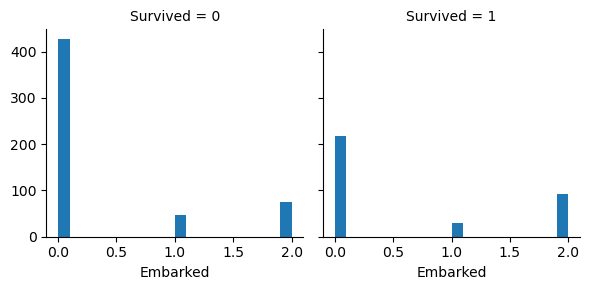

In [90]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Embarked', bins=20)
plt.show()

 #### We will pass now to see the feature "Pclass". First, I would like to take this into a numerical variable:

In [91]:
# check the correlation between Pclass and survived status
train_df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


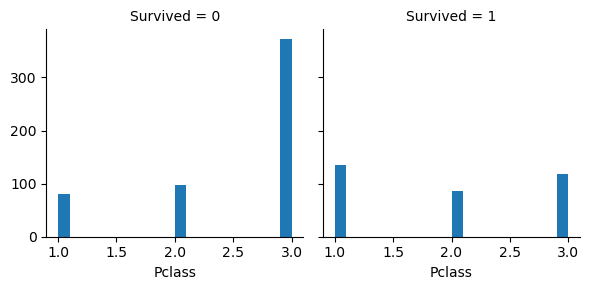

In [92]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Pclass', bins=20)
plt.show()

 #### We will pass now to see the feature "Fare". First, I would like to take this into a numerical variable:

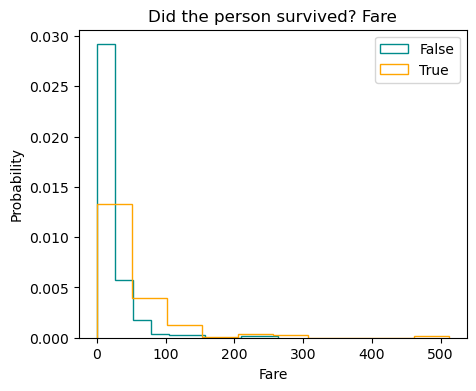

In [93]:
def check_dataset(labels):
    plt.figure(figsize = (5,4))
    single_cols_for_0 = train_df[train_df['Survived']==0][labels]
    single_cols_for_1 = train_df[train_df['Survived']==1][labels]  
    plt.hist(single_cols_for_0, label = 'False', alpha = 1,  density = True, color = 'darkcyan', histtype='step')
    plt.hist(single_cols_for_1, label = 'True', alpha = 1, density =True, color = 'orange', histtype='step' )  
    plt.title(f'Did the person survived? {labels}')   
    plt.ylabel('Probability')   
    plt.xlabel(labels)  
    plt.legend()   
    plt.show()   
check_dataset('Fare')

 #### Lets deal with the feature "Name". By the name itself no so much can be done at first insight but the status or rol of the person like the title could have play a huge role at the moment to choose who gets a boats

In [94]:
train_titles = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False) # we get the title using pandas method
test_titles = test_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False) # we get the title using pandas methods

In [95]:
print(np.unique(train_titles))
print(np.unique(test_titles))

['Capt' 'Col' 'Countess' 'Don' 'Dr' 'Jonkheer' 'Lady' 'Major' 'Master'
 'Miss' 'Mlle' 'Mme' 'Mr' 'Mrs' 'Ms' 'Rev' 'Sir']
['Col' 'Dona' 'Dr' 'Master' 'Miss' 'Mr' 'Mrs' 'Ms' 'Rev']


 #### We proceed to replace some titles, for example: 
 ##### Miss / Mlle: "Mlle" (Mademoiselle) is the French equivalent of "Miss." 
 ##### Mrs / Mme: "Mme" (Madame) is the French equivalent of "Mrs."
 ##### Mr / Don: In some contexts, "Don" can be a title of respect similar to "Mr" in Spanish and Italian cultures.
 ##### Mrs / Dona: In some contexts, "Dona" can be a title of respect similar to "Mrs" in Spanish and Italian cultures.

In [96]:
train_titles = train_titles.replace('Mlle', 'Miss')
train_titles = train_titles.replace('Mme', 'Mrs')
train_titles = train_titles.replace('Don', 'Mr')

test_titles = test_titles.replace('Dona', 'Mrs')

In [97]:
# you can also use
# replace_titles = {'Mlle': 'Miss', 'Mme': 'Mrs', 'Don': 'Mr')
# titles = titles.replace(replace_titles)

In [98]:
print(np.unique(train_titles))
print(np.unique(test_titles))

['Capt' 'Col' 'Countess' 'Dr' 'Jonkheer' 'Lady' 'Major' 'Master' 'Miss'
 'Mr' 'Mrs' 'Ms' 'Rev' 'Sir']
['Col' 'Dr' 'Master' 'Miss' 'Mr' 'Mrs' 'Ms' 'Rev']


In [99]:
# we check the titles object length to make sure it match with the length of the other features
print(f'New title column lenght for train dataset: {len(train_titles)}')
print(f'New title column lenght for test dataset: {len(test_titles)}')

New title column lenght for train dataset: 891
New title column lenght for test dataset: 418


 #### We add a new column named 'Ptitles' and remove 'Name' 

In [100]:
train_df['Ptitle'] = train_titles
test_df['Ptitle'] = test_titles

train_df = train_df.drop('Name', axis=1)
test_df = test_df.drop('Name', axis=1)

In [101]:
train_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Ptitle
0,3,1,22.0,1,0,7.2500,0.0,0,Mr
1,1,0,38.0,1,0,71.2833,2.0,1,Mrs
2,3,0,26.0,0,0,7.9250,0.0,1,Miss
3,1,0,35.0,1,0,53.1000,0.0,1,Mrs
4,3,1,35.0,0,0,8.0500,0.0,0,Mr
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0.0,0,Rev
887,1,0,19.0,0,0,30.0000,0.0,1,Miss
888,3,0,NaN,1,2,23.4500,0.0,0,Miss
889,1,1,26.0,0,0,30.0000,2.0,1,Mr


In [102]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ptitle
0,3,1,34.5,0,0,7.8292,1,Mr
1,3,0,47.0,1,0,7.0000,0,Mrs
2,2,1,62.0,0,0,9.6875,1,Mr
3,3,1,27.0,0,0,8.6625,0,Mr
4,3,0,22.0,1,1,12.2875,0,Mrs
...,...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,0,Mr
414,1,0,39.0,0,0,108.9000,2,Mrs
415,3,1,38.5,0,0,7.2500,0,Mr
416,3,1,NaN,0,0,8.0500,0,Mr


 #### Before analyzing the correlation between 'Ptitle' and 'Survived', we map the titles to integers values

In [103]:
title_map_dic = {'Capt':0 , 'Col':1,  'Countess':2, 'Dr':3, 'Jonkheer':4, 'Lady':5, 'Major':6, 'Master':7, 'Miss':8,
                 'Mr':9, 'Mrs':10, 'Ms':11, 'Rev':12, 'Sir':13}

In [104]:
train_df['Ptitle'] = train_df['Ptitle'].map(title_map_dic)
test_df['Ptitle'] = test_df['Ptitle'].map(title_map_dic)

In [105]:
train_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Ptitle
0,3,1,22.0,1,0,7.2500,0.0,0,9
1,1,0,38.0,1,0,71.2833,2.0,1,10
2,3,0,26.0,0,0,7.9250,0.0,1,8
3,1,0,35.0,1,0,53.1000,0.0,1,10
4,3,1,35.0,0,0,8.0500,0.0,0,9
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0.0,0,12
887,1,0,19.0,0,0,30.0000,0.0,1,8
888,3,0,NaN,1,2,23.4500,0.0,0,8
889,1,1,26.0,0,0,30.0000,2.0,1,9


In [106]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ptitle
0,3,1,34.5,0,0,7.8292,1,9
1,3,0,47.0,1,0,7.0000,0,10
2,2,1,62.0,0,0,9.6875,1,9
3,3,1,27.0,0,0,8.6625,0,9
4,3,0,22.0,1,1,12.2875,0,10
...,...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,0,9
414,1,0,39.0,0,0,108.9000,2,10
415,3,1,38.5,0,0,7.2500,0,9
416,3,1,NaN,0,0,8.0500,0,9


 #### We can see that there is a correlation between 'Survived' and 'Ptitle'

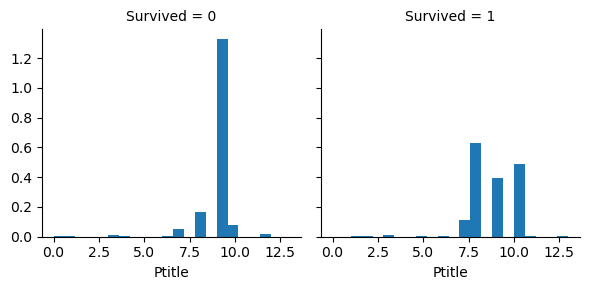

In [107]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Ptitle', bins=20, density = True)
plt.show()

 #### We proceed to study the last two missing columns: 'SibSp' and 'Parch'. In principle, we could think that people having kids would have higher priority than people travelling alone, even more, mothers, since according the history, they were being allowing to board with the kids but it was not always the case for the fathers. Therefore, we would like to find a way to separate the people that is travelling alone from those who are with any kind of family, that is, childrens, parents, etc.

In [108]:
train_df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Ptitle
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000,891.000000,891.000000
mean,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.464567,0.383838,8.772166
std,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.792088,0.486592,1.094804
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,8.000000
50%,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,9.000000
75%,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,9.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000,13.000000


In [109]:
test_df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ptitle
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000,418.000000
mean,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188,0.598086,8.854067
std,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576,0.854496,0.994105
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000,9.000000
50%,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200,0.000000,9.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000,1.000000,9.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000,12.000000


In [110]:
# create numy array filled with zeros

# Initializing array for is_alone data
train_is_alone = np.zeros(len(train_df['Pclass'])) 
test_is_alone = np.zeros(len(test_df['Pclass']))

# Initializing array for family size
train_family_size = np.zeros(len(train_df['Pclass'])) 
test_family_size = np.zeros(len(test_df['Pclass'])) 


In [111]:
# we consider that the alone people has input values 0 in both 'SibSp'andd 'Parch'

# filling arrays with train dataset
for i in range(0,len(train_df['Pclass'])):                             
    train_family_size[i] = train_df['Parch'][i]+train_df['SibSp'][i]+1
    if train_df['Parch'][i]==0 and train_df['SibSp'][i]==0:
        train_is_alone[i]=1

# filling arrays with test dataset
for i in range(0,len(test_df['Pclass'])):
    test_family_size[i] = test_df['Parch'][i]+test_df['SibSp'][i]+1
    if test_df['Parch'][i]==0 and test_df['SibSp'][i]==0:
        test_is_alone[i]=1


In [112]:
#print(f'Family size for train dataset are: {train_family_size}')
#print(f'Is_alone for train dataset are: {train_is_alone}')

In [113]:
# adding data columns to dataframe

# 'is_alone' column
train_df['is_alone'] = train_is_alone
test_df['is_alone'] = test_is_alone

# 'family_size' column
train_df['family_size'] = train_family_size
test_df['family_size'] = test_family_size


In [114]:
train_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Ptitle,is_alone,family_size
0,3,1,22.0,1,0,7.2500,0.0,0,9,0.0,2.0
1,1,0,38.0,1,0,71.2833,2.0,1,10,0.0,2.0
2,3,0,26.0,0,0,7.9250,0.0,1,8,1.0,1.0
3,1,0,35.0,1,0,53.1000,0.0,1,10,0.0,2.0
4,3,1,35.0,0,0,8.0500,0.0,0,9,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0.0,0,12,1.0,1.0
887,1,0,19.0,0,0,30.0000,0.0,1,8,1.0,1.0
888,3,0,NaN,1,2,23.4500,0.0,0,8,0.0,4.0
889,1,1,26.0,0,0,30.0000,2.0,1,9,1.0,1.0


In [115]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ptitle,is_alone,family_size
0,3,1,34.5,0,0,7.8292,1,9,1.0,1.0
1,3,0,47.0,1,0,7.0000,0,10,0.0,2.0
2,2,1,62.0,0,0,9.6875,1,9,1.0,1.0
3,3,1,27.0,0,0,8.6625,0,9,1.0,1.0
4,3,0,22.0,1,1,12.2875,0,10,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,0,9,1.0,1.0
414,1,0,39.0,0,0,108.9000,2,10,1.0,1.0
415,3,1,38.5,0,0,7.2500,0,9,1.0,1.0
416,3,1,NaN,0,0,8.0500,0,9,1.0,1.0


 #### For now, we will keep 'SibSp' and 'Parch' and after train our model we will compare the accuracy with and without these features

 #### Next step is to look for non or missing values in our datasets, if that is the case, we need to do an extra step

In [116]:
train_df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Ptitle,is_alone,family_size
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.464567,0.383838,8.772166,0.602694,1.904602
std,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.792088,0.486592,1.094804,0.489615,1.613459
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,8.000000,0.000000,1.000000
50%,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,9.000000,1.000000,1.000000
75%,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,9.000000,1.000000,2.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000,13.000000,1.000000,11.000000


In [117]:
test_df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ptitle,is_alone,family_size
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188,0.598086,8.854067,0.605263,1.839713
std,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576,0.854496,0.994105,0.489380,1.519072
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000,9.000000,0.000000,1.000000
50%,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200,0.000000,9.000000,1.000000,1.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000,1.000000,9.000000,1.000000,2.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000,12.000000,1.000000,11.000000


 #### Taking a look at the dataframes above we can see that train dataset is missing values in 'Age' and 'Embarke'. On the other hand, test dataset is missing values in 'Age' and 'Fare'.

 ##### Lets start with 'Age':

In [118]:
train_df[["Pclass", "Age"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Age', ascending=False)

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


In [119]:
train_df[["Ptitle", "Age"]].groupby(['Ptitle'], as_index=False).mean().sort_values(by='Age', ascending=False)

,Ptitle,Age
0,0,70.000000
1,1,58.000000
13,13,49.000000
6,6,48.500000
5,5,48.000000
12,12,43.166667
3,3,42.000000
4,4,38.000000
10,10,35.788991
2,2,33.000000


In [120]:
train_df[["is_alone", "Age"]].groupby(['is_alone'], as_index=False).mean().sort_values(by='Age', ascending=False)

,is_alone,Age
1,1.0,32.220297
0,0.0,26.413452


In [121]:
train_df[["Sex", "Age"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Age', ascending=False)

,Sex,Age
1,1,30.726645
0,0,27.915709


 #### As you could expect, the title of a person is not only related to the social-economical status but also the age of the person. Thats why we have decided to fill the nan values with the average age of the people sharing the same title

In [122]:
train_corr = train_df[["Ptitle", "Age"]].groupby(['Ptitle'], as_index=False).mean().sort_values(by='Ptitle', ascending=True)
test_corr = test_df[["Ptitle", "Age"]].groupby(['Ptitle'], as_index=False).mean().sort_values(by='Ptitle', ascending=True)

train_age = train_corr['Age'].to_numpy()
train_ptitle = train_corr['Ptitle'].to_numpy()

test_age = test_corr['Age'].to_numpy()
test_ptitle = test_corr['Ptitle'].to_numpy()

 ##### We use two similar apporaches for the train and test datasets: for the train dataset we look over a range between 0 to the length of the train_title list of unique titles while for  the test dataset we loop over each element of the test_title list

In [124]:
for i in range(0, len(train_df['Pclass'])):
    if np.isnan(train_df['Age'][i]):
        for j in range(0, len(train_ptitle)):
            if train_df['Ptitle'][i]==train_ptitle[j]:
                train_df.loc[i, 'Age'] = train_age[j]

In [125]:
for i in range(0, len(test_df['Pclass'])):
    if np.isnan(test_df['Age'][i]):
        for j in test_ptitle:
            if test_df['Ptitle'][i]==j:
                test_df.loc[i, 'Age'] = j

 ##### Let's see how we can complete the values in 'Embarked' from train dataset

In [131]:
train_df['Embarked'] = train_df['Embarked'].fillna(0)  # we will fill the nan values with the most common value 0:'C'

 ##### Let's see how we can complete the values in 'Fare' from test dataset

In [132]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())  # we will fill the nan values with the most common value 0:'C'

In [133]:
train_df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Ptitle,is_alone,family_size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.756346,0.523008,0.381594,32.204208,0.463524,0.383838,8.772166,0.602694,1.904602
std,0.836071,0.477990,13.275998,1.102743,0.806057,49.693429,0.791503,0.486592,1.094804,0.489615,1.613459
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.804054,0.000000,0.000000,7.910400,0.000000,0.000000,8.000000,0.000000,1.000000
50%,3.000000,1.000000,30.000000,0.000000,0.000000,14.454200,0.000000,0.000000,9.000000,1.000000,1.000000
75%,3.000000,1.000000,35.788991,1.000000,0.000000,31.000000,1.000000,1.000000,9.000000,1.000000,2.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000,13.000000,1.000000,11.000000


In [134]:
test_df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ptitle,is_alone,family_size
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,25.872010,0.447368,0.392344,35.627188,0.598086,8.854067,0.605263,1.839713
std,0.841838,0.481622,15.319001,0.896760,0.981429,55.840500,0.854496,0.994105,0.489380,1.519072
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,1.000000,0.000000,10.000000,0.000000,0.000000,7.895800,0.000000,9.000000,0.000000,1.000000
50%,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200,0.000000,9.000000,1.000000,1.000000
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000,1.000000,9.000000,1.000000,2.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000,12.000000,1.000000,11.000000


 #### Now, we are ready to train our model

# Training

 #### Let's take a look at the structure and sorting of our datasets

In [135]:
train_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Ptitle,is_alone,family_size
0,3,1,22.000000,1,0,7.2500,0.0,0,9,0.0,2.0
1,1,0,38.000000,1,0,71.2833,2.0,1,10,0.0,2.0
2,3,0,26.000000,0,0,7.9250,0.0,1,8,1.0,1.0
3,1,0,35.000000,1,0,53.1000,0.0,1,10,0.0,2.0
4,3,1,35.000000,0,0,8.0500,0.0,0,9,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0.0,0,12,1.0,1.0
887,1,0,19.000000,0,0,30.0000,0.0,1,8,1.0,1.0
888,3,0,21.804054,1,2,23.4500,0.0,0,8,0.0,4.0
889,1,1,26.000000,0,0,30.0000,2.0,1,9,1.0,1.0


In [136]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ptitle,is_alone,family_size
0,3,1,34.5,0,0,7.8292,1,9,1.0,1.0
1,3,0,47.0,1,0,7.0000,0,10,0.0,2.0
2,2,1,62.0,0,0,9.6875,1,9,1.0,1.0
3,3,1,27.0,0,0,8.6625,0,9,1.0,1.0
4,3,0,22.0,1,1,12.2875,0,10,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
413,3,1,9.0,0,0,8.0500,0,9,1.0,1.0
414,1,0,39.0,0,0,108.9000,2,10,1.0,1.0
415,3,1,38.5,0,0,7.2500,0,9,1.0,1.0
416,3,1,9.0,0,0,8.0500,0,9,1.0,1.0


 #### We would like to have a feature matrix, therefore, the features in both datasets must be sorted in the same way::

In [137]:
train_df['Survived'] = train_df.pop('Survived')  # we move the 'Survived' column to the end of data frame

In [138]:
train_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ptitle,is_alone,family_size,Survived
0,3,1,22.000000,1,0,7.2500,0.0,9,0.0,2.0,0
1,1,0,38.000000,1,0,71.2833,2.0,10,0.0,2.0,1
2,3,0,26.000000,0,0,7.9250,0.0,8,1.0,1.0,1
3,1,0,35.000000,1,0,53.1000,0.0,10,0.0,2.0,1
4,3,1,35.000000,0,0,8.0500,0.0,9,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0.0,12,1.0,1.0,0
887,1,0,19.000000,0,0,30.0000,0.0,8,1.0,1.0,1
888,3,0,21.804054,1,2,23.4500,0.0,8,0.0,4.0,0
889,1,1,26.000000,0,0,30.0000,2.0,9,1.0,1.0,1


In [139]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ptitle,is_alone,family_size
0,3,1,34.5,0,0,7.8292,1,9,1.0,1.0
1,3,0,47.0,1,0,7.0000,0,10,0.0,2.0
2,2,1,62.0,0,0,9.6875,1,9,1.0,1.0
3,3,1,27.0,0,0,8.6625,0,9,1.0,1.0
4,3,0,22.0,1,1,12.2875,0,10,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
413,3,1,9.0,0,0,8.0500,0,9,1.0,1.0
414,1,0,39.0,0,0,108.9000,2,10,1.0,1.0
415,3,1,38.5,0,0,7.2500,0,9,1.0,1.0
416,3,1,9.0,0,0,8.0500,0,9,1.0,1.0


In [164]:
train, valid = np.split(train_df.sample(frac=1), [int(0.8*len(train_df))])
# we split the dataset 80% for training, and 20% for validation

/home/felipe/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


 #### We are ready to train:

In [145]:
def scale_train_dataset(dataframe, oversample = False):   # we create a function to rescale all the data from our feature matrix
    X = dataframe[dataframe.columns[:-1]].values  # get the feature matrix X. All columns by the lat one ('class')
    y = dataframe[dataframe.columns[-1]].values   # get the target vector y. Only the last column ('class')

    scaler = StandardScaler()                # create a StandardScaler object
    X = scaler.fit_transform(X)  # user a fit_transform() method from StandardScaler to subtract the mean and divide variance

    if oversample:                             # check if oversample is true or not
        ros = RandomOverSampler()              # initialize RandomOverSampler object
        X,y = ros.fit_resample(X,y)            # resample the smaller sample to match the size of the larger sample
        
    data = np.hstack((X,np.reshape(y,(-1,1))))   # put X and y in the same array. We need to reshape y
    
    return data,X,y 

In [165]:
train, X_train, y_train = scale_train_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_train_dataset(valid, oversample=False)

 #### Let's check one single model

In [166]:
svc_model = SVC()  # initialize Support Vector Machine model

In [167]:
svc_model.fit(X_train,y_train)

SVC()

In [316]:
y_pred = svc_model.predict(X_valid)  # getting the predicted vector y from our modek

 #### Let's check the accuracy of the model

In [318]:
print(classification_report(y_valid,y_pred))  # preddictions using SVC 

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       104
           1       0.83      0.77      0.80        75

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



# More Models

## kNN : k-nearest reighbors

In [332]:
n = 1            # number of k-neighbors
knn_model = KNeighborsClassifier(n_neighbors = n)    # setting up the model
knn_model.fit(X_train, y_train)     # training kNN model

KNeighborsClassifier(n_neighbors=1)

In [333]:
y_pred = knn_model.predict(X_valid)   # getting predicted data from the model by input the test data

In [334]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       104
           1       0.82      0.79      0.80        75

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [346]:
accuracy = []
L1 = []
L2 = []
for i in range(1,11,1):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_valid)
    acc = classification_report(y_valid,y_pred, output_dict= True)['accuracy']

    l1 = mean_absolute_error(y_pred, y_valid)
    l2 = mean_squared_error(y_pred, y_valid)
    accuracy.append(acc)
    L1.append(l1)
    L2.append(l2)

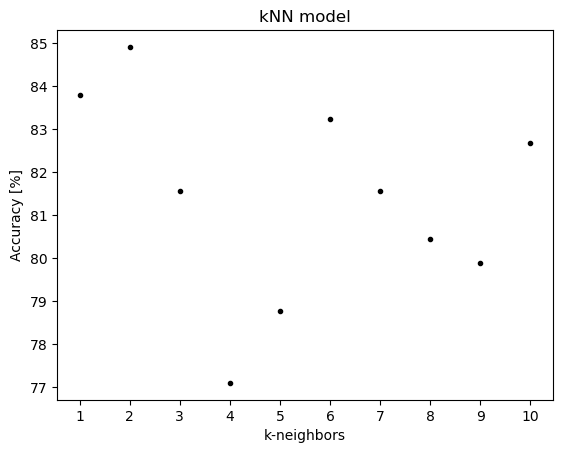

In [347]:
plt.plot(np.arange(1,11,1), 100*np.array(accuracy), '.', color = 'black')
plt.ylabel('Accuracy [%]')
plt.xlabel('k-neighbors')
plt.title('kNN model')
plt.xticks((np.arange(1,11,1)))
plt.show()

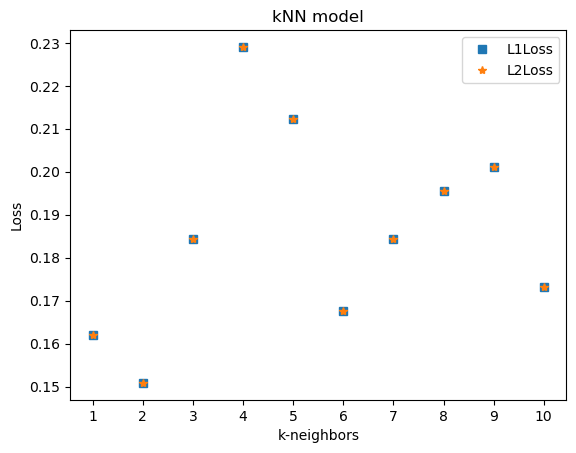

In [348]:
plt.plot(np.arange(1,11,1), L1, 's', label = 'L1Loss' )
plt.plot(np.arange(1,11,1), L2, '*', label = 'L2Loss')
plt.ylabel('Loss')
plt.xlabel('k-neighbors')
plt.title('kNN model')
plt.xticks((np.arange(1,11,1)))
plt.legend()
plt.show()

## Naive Bayes

In [350]:
models = [GaussianNB(), BernoulliNB()]

In [351]:
accuracy = []
L1 = []
L2 = []
for i in range(0,len(models)):
    nb_model = models[i]
    nb_model.fit(X_train,y_train)
    y_pred = nb_model.predict(X_valid)
    acc = classification_report(y_valid,y_pred, output_dict= True)['accuracy']
    
    l1 = mean_absolute_error(y_pred, y_valid)
    l2 = mean_squared_error(y_pred, y_valid)
    accuracy.append(acc)
    L1.append(l1)
    L2.append(l2) 

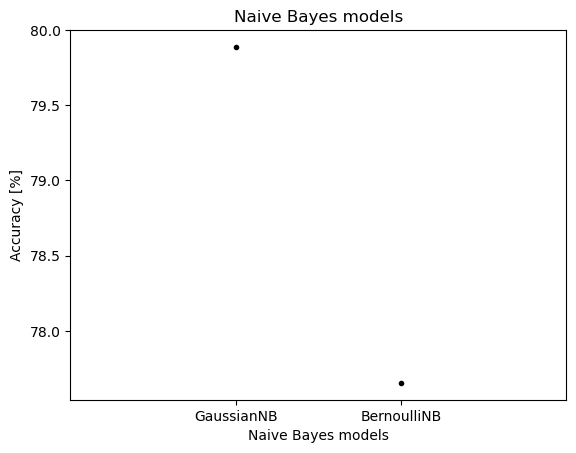

In [352]:
plt.plot(['GaussianNB', 'BernoulliNB'], 100*np.array(accuracy), '.', color = 'black')
plt.ylabel('Accuracy [%]')
plt.xlabel('Naive Bayes models')
plt.title('Naive Bayes models')
plt.xlim(-1,2)
plt.show()

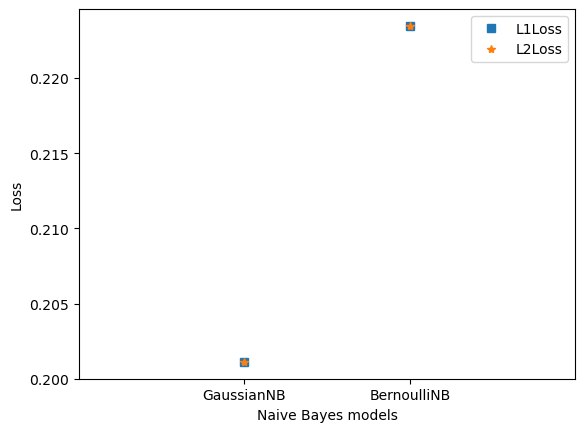

In [353]:
plt.plot(['GaussianNB', 'BernoulliNB'], L1, 's', label = 'L1Loss' )
plt.plot(['GaussianNB', 'BernoulliNB'], L2, '*', label = 'L2Loss')
plt.ylabel('Loss')
plt.xlabel('Naive Bayes models')
plt.xlabel('Naive Bayes models')
plt.xlim(-1,2)
plt.legend()
plt.show()

## Logistic Regression

In [355]:
penalty = ['l1', 'l2']

In [356]:
accuracy = []
L1 = []
L2 = []

for i in penalty:
    lgr_model = LogisticRegression(penalty=i, solver='liblinear')
    lgr_model.fit(X_train, y_train)
    y_pred = lgr_model.predict(X_valid)
    acc = classification_report(y_valid,y_pred, output_dict= True)['accuracy']
    
    l1 = mean_absolute_error(y_pred, y_valid)
    l2 = mean_squared_error(y_pred, y_valid)
    accuracy.append(acc)
    L1.append(l1)
    L2.append(l2)

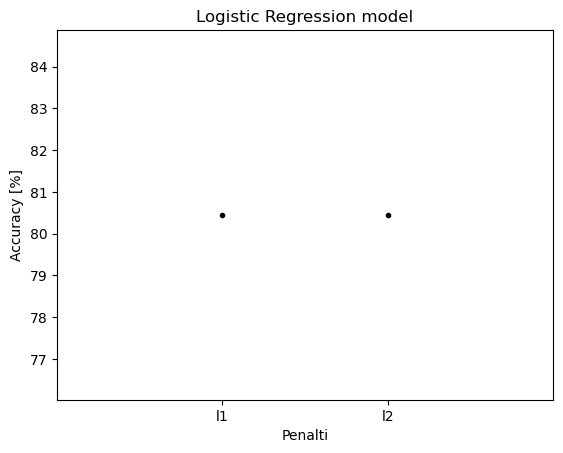

In [357]:
plt.plot(['l1', 'l2'], 100*np.array(accuracy), '.', color = 'black')
plt.ylabel('Accuracy [%]')
plt.xlabel('Penalti')
plt.title('Logistic Regression model')
plt.xlim(-1,2)
plt.show()

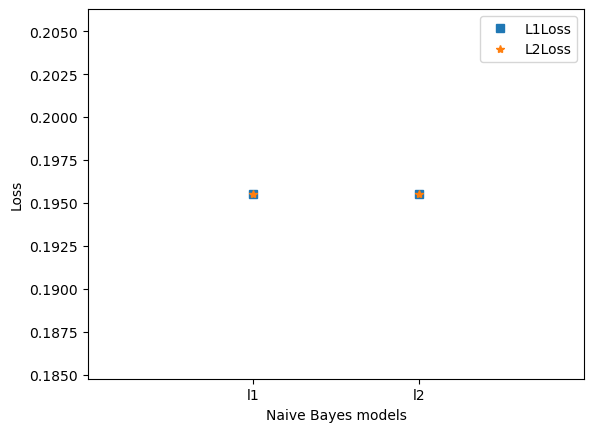

In [358]:
plt.plot(['l1', 'l2'], L1, 's', label = 'L1Loss' )
plt.plot(['l1', 'l2'], L2, '*', label = 'L2Loss')
plt.ylabel('Loss')
plt.xlabel('Naive Bayes models')
plt.xlabel('Naive Bayes models')
plt.xlim(-1,2)
plt.legend()
plt.show()

## Support Vector Machines

In [360]:
models = [SVC(), NuSVC()]

In [361]:
accuracy = []
L1 = []
L2 = []
for i in models:
    nb_model = i
    nb_model.fit(X_train,y_train)
    y_pred = nb_model.predict(X_valid)
    acc = classification_report(y_valid,y_pred, output_dict= True)['accuracy']
    
    l1 = mean_absolute_error(y_pred, y_valid)
    l2 = mean_squared_error(y_pred, y_valid)
    accuracy.append(acc)
    L1.append(l1)
    L2.append(l2)   

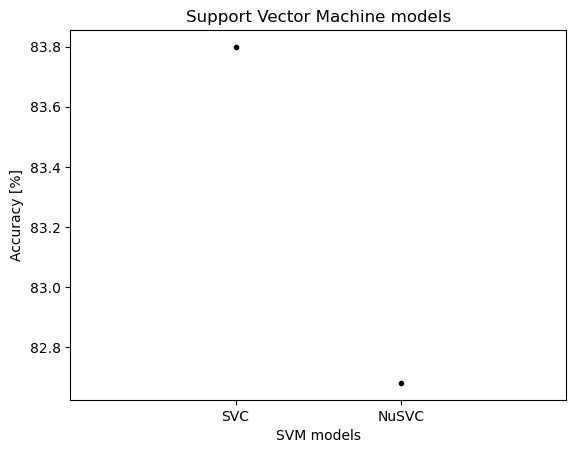

In [362]:
plt.plot(['SVC', 'NuSVC'], 100*np.array(accuracy), '.', color = 'black')
plt.ylabel('Accuracy [%]')
plt.xlabel('SVM models')
plt.title('Support Vector Machine models')
plt.xlim(-1,2)
plt.show()

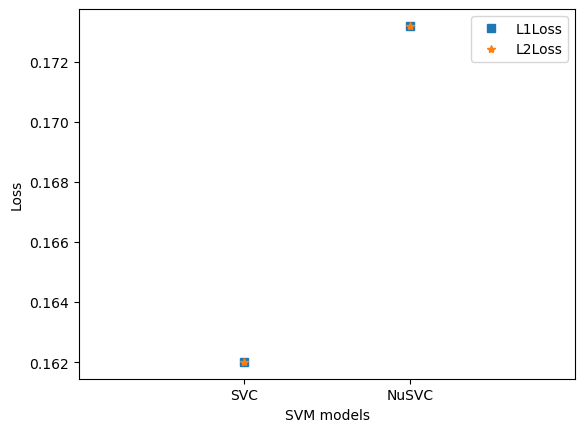

In [363]:
plt.plot(['SVC', 'NuSVC'], L1, 's', label = 'L1Loss' )
plt.plot(['SVC', 'NuSVC'], L2, '*', label = 'L2Loss')
plt.ylabel('Loss')
plt.xlabel('SVM models')
plt.xlabel('SVM models')
plt.xlim(-1,2)
plt.legend()
plt.show()

# Final comments

 #### We have found that the model giving the best accuracy is the kNN : k-nearest reighbors model with k=2. With this model we have obtained an accuracy of arround 85% and a loss of 0.15. We need to mentioned that probably other models could do even better if we start looking deeper into the model parameters. Here, we just take most of the cases, the default values.

 #### Predict using test values

In [367]:
knn_model = KNeighborsClassifier(n_neighbors = 2) 
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [370]:
y_pred  # final prediction from test data

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,